이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

In [3]:
%pip install tensorflow

In [5]:
# 코랩에서 메모리 부족을 피하기 위해 부동소수점 정밀도를 낮춥니다.
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

# 5장 머신 러닝의 기본 요소

## 5.1 일반화: 머신 러닝의 목표

훈련(에포크)가 계속 진행 될 수록 훈련 데이터을 대상으로 한 성능은 향상 되지만 검증 데이터(= 새로운 데이터)에 대한 성능은 저하된다. (과대적합)

최적화(optimization)
- 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정

일반화(generalization)
- 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지를 의미한다.

### 5.1.1 과소적합과 과대적합

훈련이 반복 될 수록 훈련 손실은 계속 감소하지만, 검증 손실은 특정 횟수 만큼 반복하고 나면 감소 되다가 다시 증가한다.

- 최소적합: 네트워크가 훈련 데이터에 있는 모든 관련 패턴을 학습하지 못함
- 최적적합: 이 이상 반복 하더라도 일반화 성능이 개선 되지 않고, 검증 세트 성능 감소하기 시작
- 과대적합: 훈련 데이터에 특화된 패턴을 학습, 새로운 데이터와 관련성이 적음

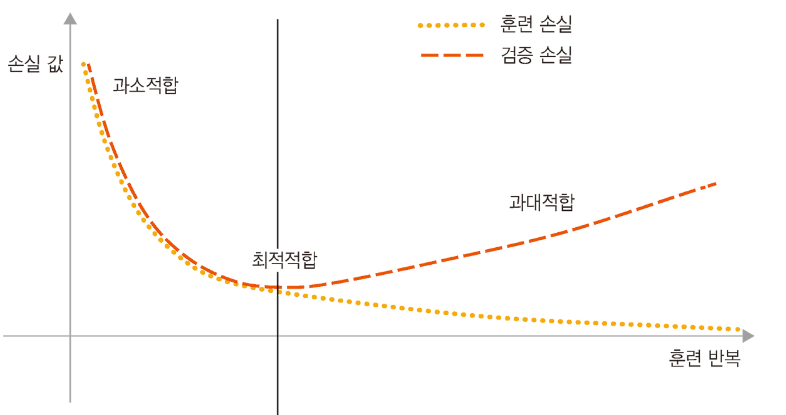

#### 잡음 섞인 훈련 데이터

모델을 이상치(부정확성)에 맞추려고 하면 일반화 성능이 감소된다.

#### 불확실한 특성

특성 공간의 모호한 영역에 너무 확실을 가지면 이런 확률적인 데이터에 과대적합될 수 있다. 최적적합은 포인트를 무시하고 더 큰 그림을 바라봐야한다.

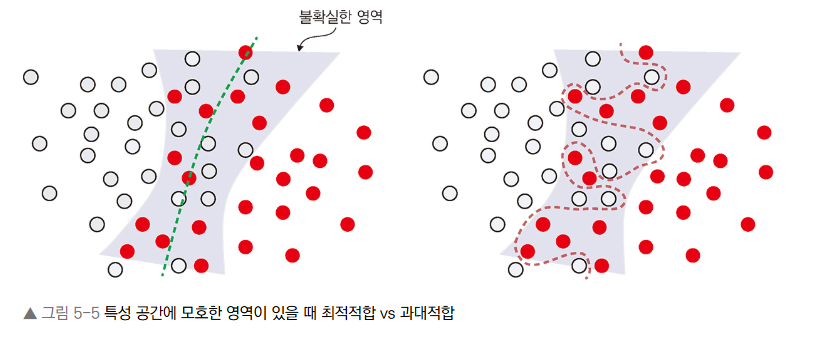

#### 드문 특성과 가짜 상관관계

드문 특성 값을 포함한 데이터셋에서 훈련한 머신 러닝 모델은 과대적합될 가능성이 매우 높다. 통계적으로 완전히 우연일 수 있지만 모델은 분류 작업에 이 특성을 활용할 가능성이 높다. 

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [6]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, 
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, 
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6969 - loss: 1.0779 - val_accuracy: 0.9111 - val_loss: 0.2971
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9160 - loss: 0.2824 - val_accuracy: 0.9448 - val_loss: 0.1921
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9493 - loss: 0.1815 - val_accuracy: 0.9492 - val_loss: 0.1691
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9688 - loss: 0.1255 - val_accuracy: 0.9561 - val_loss: 0.1469
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9811 - loss: 0.0896 - val_accuracy: 0.9658 - val_loss: 0.1232
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9887 - loss: 0.0650 - val_accuracy: 0.9341 - val_loss: 0.2462
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9914 - loss: 0.0513 - val_accuracy: 0.9614 - val_loss: 0.1433
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9939 - loss: 0.0370 - val_accu

**검증 정확도 비교 그래프 그리기**

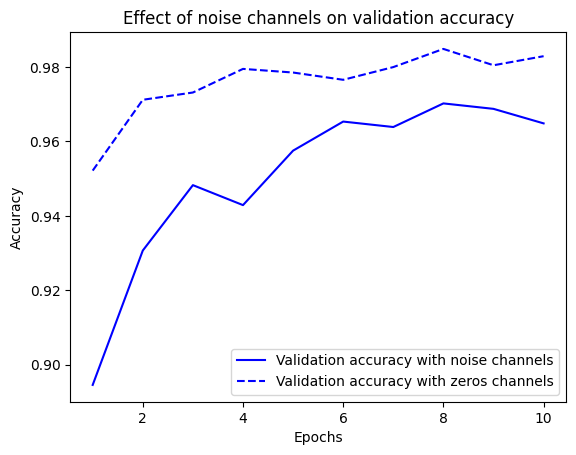

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

잠음이 섞인 데이터에서의 훈련된 모델의 검증 정확도가 낮다. 

잡음 특성은 필연적으로 과대적합을 유발시킨다. 

따라서 특성이 모델에 유익한지 확실하지 않다면 훈련 전에 **특성 선택**을 수행하는 것이 일반적이다.

### 5.1.2 딥러닝에서 일반화의 본질

표현 능력이 충분하다면 어떤 것에도 맞추도록 훈련할 수 있다.

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: inf - accuracy: 0.1014 - val_loss: 2.2969 - val_accuracy: 0.1068
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: inf - accuracy: 0.1168 - val_loss: 2.3008 - val_accuracy: 0.1052
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1246 - val_loss: 2.3203 - val_accuracy: 0.0989
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1365 - val_loss: 2.3242 - val_accuracy: 0.1040
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1466 - val_loss: 2.3418 - val_accuracy: 0.1005
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1621 - val_loss: 2.3516 - val_accuracy: 0.1008
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1726 - val_loss: 2.3535 - val_accuracy: 0.1013
Epoch 8/100
375/375 

#### 매니폴드 가설

매니폴드
- 국부적으로 선형(유클리드) 공간과 비슷하게 보이는 부모 공간의 저차원 부분 공간
- 곡선: 2D 공간 안에 있는 1D 매니폴드
- 표면: 3D 공간 안에 있는 2D 매니폴드

매니폴드 가설
- 실제 세상의 모든 데이터가 고차원 공간 안에 있는 저차원 매니폴드에 놓여 있다고 가정한다.

매니폴드 가설과 머신러닝
- 머신러닝 모델은 가능한 입력 공간안에서 비교적 간단하고, 저차원이며, 매주 구조적인 공간(잠재 매니폴드; latent manifold)만 학습하면 된다
- 매니폴드 중 하나 안에서 **두 입력 사이를 보간(interpolation)하는 것**이 항상 가능하다. 연속적인 경로를 따라 한 입력에서 다른 입력으로 변형할 때 모든 포인트가 이 매니폴드에 속한다.

#### 일반화의 원천인 보간

공간 안의 샘플만 사용해서 공간 전체를 이해할 수 있다. (보간을 사용해서 빈곳을 채울 수 있다.)

지역 일반화(local generalization)
- 보간은 이전에 본 것과 매우 가까운 것을 이해하는 데 도움을 준다.
- 예. 직관, 패턴 인식

궁극 일반화(extreme generalization)
- 보간 이외의 인지 메커니즘
- 예. 추상화, 상징적 모델, 추론, 논리, 상식, 이성



#### 딥러닝이 작동하는 이유

딥러닝
- 잠재 매니폴드를 풀기 위한 도구
- 고차원 곡선(매니폴드)
  - **미분** 할 수 있는 매끈하고 **연속적인 곡선**
  - **경사하강법**을 사용하여 이 곡선을 부드럽고 점진적으로 데이터 포인트에 맞춘다.
  - 고차원 곡선를 선택하여 훈련 데이터 포인트에 맞을 때 까지 파라미터를 점진적으로 조정하는 것이다.

매니포드 가설
- 데이터는 입력 공간 안에 고도로 구조적인 저차원 매니폴드를 형성한다. 

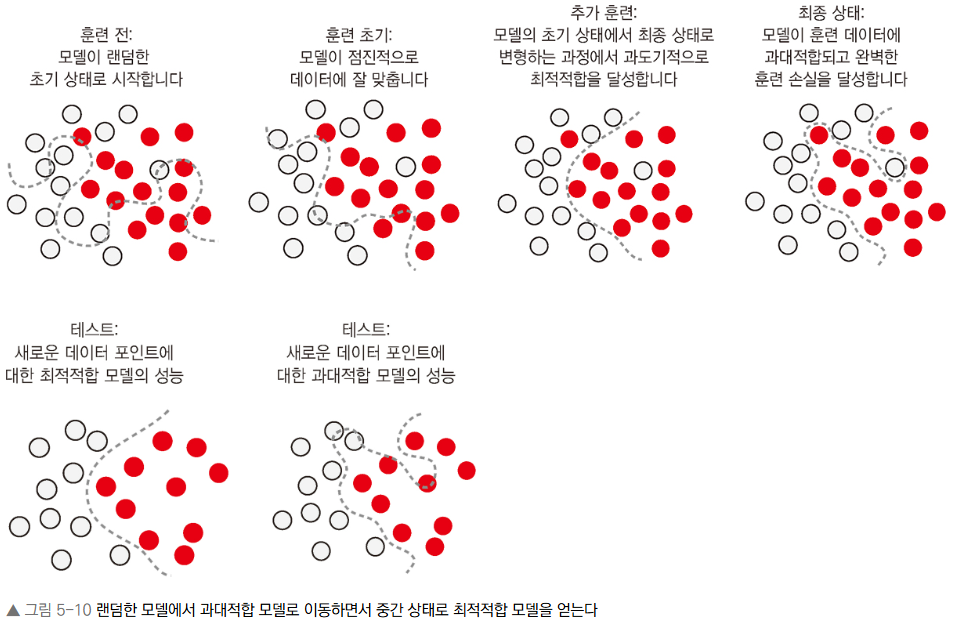

일반화
- 모델이 훈련 입력 사이를 보간하여 이전에 본 적 없는 입력을 이해할 수 있다.


#### 가장 중요한 훈련 데이터

딥러닝은 데이터가 보간할 수 있는 매니폴드를 형성하는 경우에만 일반화 할 수 있다.

일반화
- 특성이 유익하고 잡음이 적을수록 입력 공간이 더 간단하고 구조적이기 때문에 일반화하를 잘 할 수 있다.
- 데이터 큐레이션(data curation): 수집된 데이터를 모델 학습에 적합하도록 정제하고 가공하는 일련의 과정
- 특성 공학(feature engineering): 원본 데이터에서 모델이 학습하기 좋은 새로운 특성을 생성하거나 기존 특성을 변형하는 과정

딥러닝이 곡선을 맞추는 것이기 때문에 입력 공간을 조밀하게 샘플링하여 훈련해야 한다. (조밀한 샘플링)

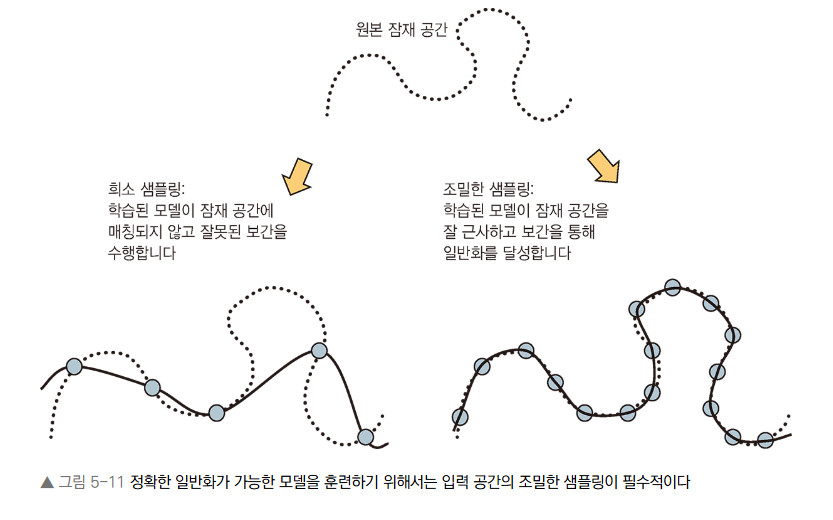

딥러닝 모델을 향상시키는 방법
1. 더 좋고, 더 많은 데이터에서 훈련하는 것
  - 잡음이 크거나 부정확한 데이터는 일반화에 해가 된다.
  - 입력 데이터 매니폴드를 조밀하게 커버하면 일반화 성능에 더 좋은 모델이 된다.
2. 모델이 저장하는 정보량을 조정하거나 모델 곡선의 매끄러운 정도에 제약을 추가하는 것
  - 규제(regularization): 과대적합 방지
  - 네트워크의 최적화 과정에서 패턴을 배우는 것을 제한한다.

## 5.2 머신 러닝 모델 평가

### 5.2.1 훈련, 검증, 테스트 세트

검증
- 검증 세트에서 모델의 성능을 평가하여 모델의 설정을 튜닝
- 파라미터 공간에서 좋은 설정을 찾는 학습
- 검정 세트 기반으로 모델을 튜닝하면 모델을 훈련하지 않더라도 과대적합이 될 수 있다.

정보 누설(information leak)
- 검증 세트를 기반으로 모델을 튜닝 할 때 마다 검증 데이터의 정보가 세는 것
- 튜닝을 거칠 수록 검증 세트에 대한 정보가 모델에 노출된다.

테스트 세트
- 완전히 새로운 데이터에 대한 성능을 확인
- 모델은 간접적으로라도 테스트 세트에 대한 어떤 정보도 얻어서는 안된다.

대표적인 방법
- 홀드아웃 검증
- K-겹 교차 검증
- 셔플링을 사용한 K-겹 교차 검증

#### 단순 홀드아웃 검증

데이터에서 테스트 세트, 검증 세트를 떼어놓고 남는 데이터로 데이터를 훈련 시킨다.

단점: 데이터가 적을 때 검증 세트와 테스트 세트의 샘플이 너무 적어 주어진 전체 데이터를 통계적으로 대표하지 못할 수 있다.

#### K-겹 교차 검증

데이터를 K 개로 분할 하여, 각 분할 i에 대해 남은 K-1개의 분할로 모델을 훈련하고 분할 i에서 모델을 평가한다. 최종 점수는 각 폴드 모델의 평균이다. 

모델의 성능이 데이터 분할에 따라 편차가 클 때 도움이 된다.

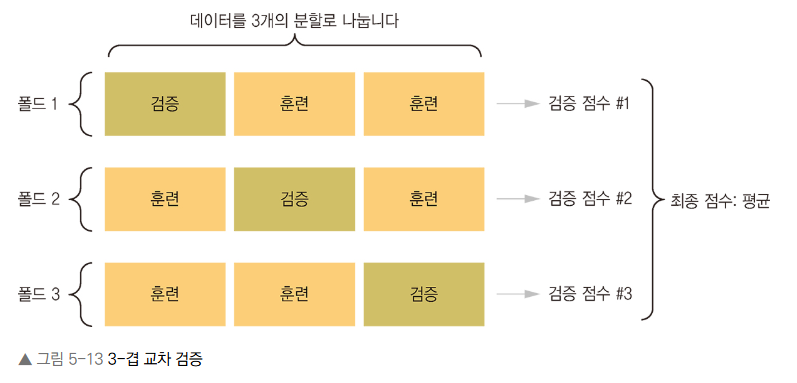

#### 셔플링을 사용한 반복 K-겹 교차 검증

가용 데이터가 적고 가능한 정확하게 모델을 평가하고자 할 때 사용한다.

K-겹 교차 검증을 여러 번 적용하되 K개의 분할로 나누기 전에 매번 데이터를 무작위로 섞는다.

단점: P(반복횟수)*K(폴드)의 모델을 훈련하고 평가하므로 비용이 많이 든다.

### 5.2.2 상식 수준의 기준점을 넘기

데이터셋으로 작업을 시작하기 전에 항상 넘어야 할 기준점을 정해야한다. 단순한 해결책보다 나은 모델을 만들어야한다. 

예
- MNIST 숫자 분류: > 0.1 (랜덤한 분류기)
- IMDB: > 0.5
- 로이터: > 0.18~0.19
- 이진 분류(불균형 데이터: 0.9가 양성 클래스): > 0.9

### 5.2.3 모델 평가에 대해 유념해야 할 점

- 대표성 있는 데이터: (특히 정렬된 데이터세트의 경우) 훈련 세트와 테스트 세트로 나누기 전에 데이터를 무작위로 섞는 것이 일반적이다. 
- 시간의 방향: 시계열 데이터에서는 데이터를 무작위로 섞어서는 안된다. 미래의 데이터가 누설된다. (과거 데이터: 훈련 세트, 미래 데이터: 테스트 세트)
- 데이터 중복: 데이터가 중복되는 경우, 동일한 데이터가 훈련 세트와 테스트 세트에 있을 수 있다. 

## 5.3 훈련 성능 향상하기

약간의 일반화 능력을 보이고 과대적합 할 수 있는 모델
- 과대적합: 경계점의 기준
- 일반화: 과대적합 된 모델의 일반화 성능을 개선하도록 튜닝

### 5.3.1 경사 하강법의 핵심 파라미터 튜닝하기

랜덤한 데이터에서도 모델을 훈련할 수 있다.

손실이 멈추어 있다면, 경사 하강법 설정에 문제가 있을 가능성이 있다.

경사 하강법 설정
- 옵티마이저 선택
- 모델 가중치의 초깃값 분포
- **학습률**
- **배치 크기**

일반적으로 나머지 파라미터를 고정하고 학습률과 배치 크기를 튜닝하는 것으로 충분하다.



**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
  optimizer=keras.optimizers.RMSprop(1.), # 부적절하게 큰 학습률: 1.0
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"]
)

model.fit(
  train_images, 
  train_labels,
  epochs=10,
  batch_size=128,
  validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0954 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0974 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0978 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0970 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0982 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0977 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 9/10
375/3

**같은 모델을 적절한 학습률로 훈련하기**

In [10]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
  optimizer=keras.optimizers.RMSprop(1e-2), # 합리적인 값의 학습률
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"]
)

model.fit(
  train_images, 
  train_labels,
  epochs=10,
  batch_size=128,
  validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8380 - loss: 0.7765 - val_accuracy: 0.9600 - val_loss: 0.1425
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9729 - loss: 0.1187 - val_accuracy: 0.9653 - val_loss: 0.1373
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9817 - loss: 0.0957 - val_accuracy: 0.9731 - val_loss: 0.1339
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9870 - loss: 0.0781 - val_accuracy: 0.9731 - val_loss: 0.1379
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9923 - loss: 0.0546 - val_accuracy: 0.9761 - val_loss: 0.1465
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9920 - loss: 0.0549 - val_accuracy: 0.9766 - val_loss: 0.1627
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9943 - loss: 0.0469 - val_accuracy: 0.9785 - val_loss: 0.1582
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9958 - loss: 0.0361 - val_accu

손실이 멈추어 있는 경우 (= 훈련이 시작되지 않거나 너무 일찍 중단되는 경우)
- 학습률을 낮추거나 높인다.
  - 너무 높은 학습률: 최적적합을 크게 뛰어넘는 업데이트가 있을 수 있다.
  - 너무 낮은 학습률: 훈련을 너무 느리게 만들어 멈추어 있는 것 처럼 보인다.
- 배치 크기를 증가시킨다.
  - 배치 샘플을 늘리면 유익하고 잡음이 적은 그레이디언트가 만들어진다.

### 5.3.2 구조에 대해 더 나은 가정하기

모델이 훈련되지만 일반화되지 않는 경우 (랜덤 분류기 보다 낫지 않은 경우)

일반화가 잘되지 않는 경우
- 입력 데이터에 타깃 예측을 위한 정보가 충분하지 않을 수 있다.
  - 일반화가 불가능한 데이터셋
- 현재 사용하는 모델의 종류가 문제에 적합하지 않을 수 있다. 
  - 구조에 대한 올바른 가정을 내려야한다.

접근 방법을 채택하는 방법
- 해결하려는 작업 종류에 적절한 구조가 무엇인지 모범 사례를 찾아볼 수 있다.

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [11]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(
  optimizer="rmsprop",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"]
)

history_small_model = model.fit(
  train_images, 
  train_labels,
  epochs=20,
  batch_size=128,
  validation_split=0.2
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7359 - loss: 1.0394 - val_accuracy: 0.9009 - val_loss: 0.3633
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8971 - loss: 0.3719 - val_accuracy: 0.9121 - val_loss: 0.3118
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9096 - loss: 0.3203 - val_accuracy: 0.9180 - val_loss: 0.2944
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9181 - loss: 0.3001 - val_accuracy: 0.9229 - val_loss: 0.2864
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9194 - loss: 0.2888 - val_accuracy: 0.9214 - val_loss: 0.2808
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9209 - loss: 0.2863 - val_accuracy: 0.9253 - val_loss: 0.2747
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9221 - loss: 0.2779 - val_accuracy: 0.9248 - val_loss: 0.2722
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9221 - loss: 0.2778 - val_accuracy: 0.

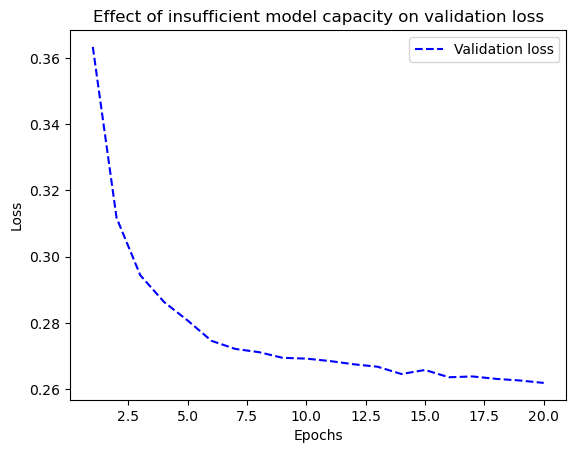

In [12]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(
  epochs, 
  val_loss, 
  "b--",
  label="Validation loss"
)
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

모델은 항상 과대적합이 가능하다. 과대적합할 수 없는 것 처럼 보인다면 모델의 표현 능력이 부족한 것이다. 용량을 더 큰 모델(= 더 많은 정보를 저장할 수 있는 모델)이 필요하다.

용량이 더 큰 모델 만들기
- 층 개수
- 층 크기 (더 많은 가중치)
- 층 종류 (구조에 대해 더 나은 가정)

In [13]:
# 96개의 유닛을 가진 2개의 중간층 추가
model = keras.Sequential([
    layers.Dense(96, activation="relu"), 
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8241 - loss: 0.6223 - val_accuracy: 0.9468 - val_loss: 0.1876
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9556 - loss: 0.1693 - val_accuracy: 0.9595 - val_loss: 0.1382
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9715 - loss: 0.1165 - val_accuracy: 0.9688 - val_loss: 0.1088
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9818 - loss: 0.0862 - val_accuracy: 0.9658 - val_loss: 0.1186
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9871 - loss: 0.0722 - val_accuracy: 0.9746 - val_loss: 0.0924
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9910 - loss: 0.0551 - val_accuracy: 0.9785 - val_loss: 0.0928
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9954 - loss: 0.0474 - val_accuracy: 0.9785 - val_loss: 0.0919
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9940 - loss: 0.0407 - val_accuracy: 0.

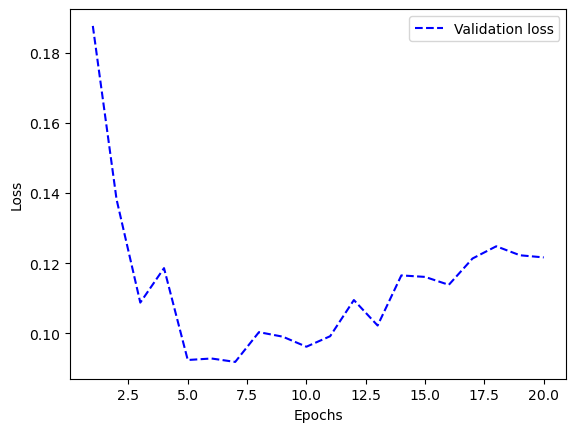

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(
  epochs, 
  val_loss, 
  "b--",
  label="Validation loss"
)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

8번째 에포크 이후 과대적합되기 시작한다.

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [12]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5938 - accuracy: 0.7188 - val_loss: 0.4775 - val_accuracy: 0.8223
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3855 - accuracy: 0.8823 - val_loss: 0.3445 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2793 - accuracy: 0.9102 - val_loss: 0.2954 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2231 - accuracy: 0.9224 - val_loss: 0.3018 - val_accuracy: 0.8760
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1873 - accuracy: 0.9380 - val_loss: 0.2815 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1600 - accuracy: 0.9487 - val_loss: 0.2976 - val_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1401 - accuracy: 0.9546 - val_loss: 0.2854 - val_accuracy: 0.8882
Epoch 8/20
30

**작은 용량의 모델**

In [13]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6519 - accuracy: 0.5933 - val_loss: 0.6040 - val_accuracy: 0.7178
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5728 - accuracy: 0.7461 - val_loss: 0.5542 - val_accuracy: 0.7925
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5244 - accuracy: 0.8154 - val_loss: 0.5210 - val_accuracy: 0.7886
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4868 - accuracy: 0.8511 - val_loss: 0.4944 - val_accuracy: 0.8511
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4570 - accuracy: 0.8818 - val_loss: 0.4780 - val_accuracy: 0.8369
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4326 - accuracy: 0.9004 - val_loss: 0.4685 - val_accuracy: 0.8369
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4116 - accuracy: 0.9146 - val_loss: 0.4497 - val_accuracy: 0.8799
Epoch 8/20
30

**큰 용량의 모델**

In [14]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5781 - accuracy: 0.7070 - val_loss: 0.3630 - val_accuracy: 0.8560
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3296 - accuracy: 0.8623 - val_loss: 0.3074 - val_accuracy: 0.8687
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2310 - accuracy: 0.9097 - val_loss: 0.3416 - val_accuracy: 0.8569
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1981 - accuracy: 0.9180 - val_loss: 0.3533 - val_accuracy: 0.8462
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1459 - accuracy: 0.9448 - val_loss: 0.3137 - val_accuracy: 0.8672
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0991 - accuracy: 0.9658 - val_loss: 0.3301 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0792 - accuracy: 0.9736 - val_loss: 0.4399 - val_accuracy: 0.8687
Epoch 8/20
30

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [15]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.6064 - accuracy: 0.7861 - val_loss: 0.4951 - val_accuracy: 0.8433
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4094 - accuracy: 0.8936 - val_loss: 0.4023 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3438 - accuracy: 0.9092 - val_loss: 0.3677 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3059 - accuracy: 0.9248 - val_loss: 0.3633 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2842 - accuracy: 0.9292 - val_loss: 0.3992 - val_accuracy: 0.8672
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2688 - accuracy: 0.9375 - val_loss: 0.3679 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2593 - accuracy: 0.9404 - val_loss: 0.3628 - val_accuracy: 0.8872
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [16]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6196 - accuracy: 0.6484 - val_loss: 0.4907 - val_accuracy: 0.8433
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4905 - accuracy: 0.7754 - val_loss: 0.3745 - val_accuracy: 0.8735
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4167 - accuracy: 0.8252 - val_loss: 0.3311 - val_accuracy: 0.8848
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3608 - accuracy: 0.8628 - val_loss: 0.2959 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3181 - accuracy: 0.8843 - val_loss: 0.2827 - val_accuracy: 0.8906
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2900 - accuracy: 0.8975 - val_loss: 0.2896 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2563 - accuracy: 0.9111 - val_loss: 0.2737 - val_accuracy: 0.8926
Epoch 8/20
30

## 요약